# MNIST dataset

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist["data"], mnist["target"]

Saving figure some_digit_plot


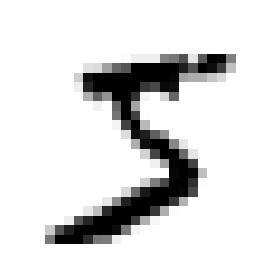

In [4]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [5]:
y = y.astype(np.uint8)

# 數量改變

In [6]:
X_train, X_test, y_train, y_test = X[:50000], X[10000:], y[:50000], y[10000:]

# RANDOM FOREST

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
clf1=RandomForestClassifier(n_estimators=3,random_state=42)
clf1.fit(X_train,y_train)

RandomForestClassifier(n_estimators=3, random_state=42)

In [9]:
clf1.score(X_test,y_test)

0.9462166666666667

# Extra-trees

In [10]:
from sklearn.ensemble import ExtraTreesClassifier

In [11]:
clf2=ExtraTreesClassifier(n_estimators=3,random_state=42)
clf2.fit(X_train,y_train)

ExtraTreesClassifier(n_estimators=3, random_state=42)

In [12]:
clf2.score(X_test,y_test)

0.962

# SVM

In [13]:
from sklearn import svm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [14]:
clf3=svm.SVC(kernel='poly',probability=True,max_iter=800,random_state=42)

In [15]:
clf3.fit(X_train,y_train)

D:\setup\Anaconda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=800).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVC(kernel='poly', max_iter=800, probability=True, random_state=42)

In [16]:
clf3.score(X_test, y_test)

0.9864833333333334

# SOFT VOTING

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

In [18]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])

In [19]:
eclf2 = VotingClassifier(estimators=[('rf', clf1), ('et', clf2), ('svm', clf3)],voting='soft')
eclf2 = eclf2.fit(X_test, y_test)

D:\setup\Anaconda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=800).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


In [20]:
eclf2.score(X_test, y_test)

0.9996166666666667